## KAGGLE BIKE SHARE CHALLENGE - Prediction Models - Machine Learning Models

For TpT Interview Assignment - June 2017

By: Divya Sriram

In [25]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [26]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [69]:
# SK-learn libraries for evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

#libraries I may need for training + modeling
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Read in training and dev data sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [29]:
print train.shape
print test.shape

(10886, 12)
(6493, 9)


In [30]:
#create new data frames and keep original train and test sets intact for reference

train_data = train
test_data = test

#separating dates into year, month, day, hour
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
train_data["year"] = train_data["datetime"].dt.year
train_data["month"] = train_data["datetime"].dt.month
train_data["day"] = train_data["datetime"].dt.day
train_data["hour"] = train_data["datetime"].dt.hour

In [31]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [32]:
#splitting train_data into train and dev
# I believe the scikit learn's train_test_split shuffles the data in this step 
train_data, dev_data = train_test_split(train_data, test_size = 0.2)

In [33]:
#creating the labels
train_labels = train_data['count']
dev_labels = dev_data['count']

In [34]:
#dropping the prediction label (count) for the train data set
train_data = train_data.drop('count', 1)
dev_data = dev_data.drop('count', 1)

I will divide the train_data set into a training and development (dev) set: 80,20 respectively. I will use the new train_data set (80% of original train_data set) to train my model and use the dev set (20% of th e original train_data set) to test the model. This allows you to test your model against a set of data you have kept aside and make changes accordingly -- using the entire training data might result in a greater accuracy for that particular training set, but is highly prone to overfitting to the training data and performing poorly with test data. 

In [35]:
#prep the test set like we did train_data
test_data = test
test_data["datetime"] = pd.to_datetime(test_data["datetime"])
test_data["year"] = test_data["datetime"].dt.year
test_data["month"] = test_data["datetime"].dt.month
test_data["day"] = test_data["datetime"].dt.day
test_data["hour"] = test_data["datetime"].dt.hour

In [36]:
print "The size of the training data set is: ", train_data.shape
print "The size of the dev data set is: ", dev_data.shape
print "The size of the test data set is: ", test.shape

The size of the training data set is:  (8708, 15)
The size of the dev data set is:  (2178, 15)
The size of the test data set is:  (6493, 13)


In [50]:
cols = ['hour']
#cols = ['hour', 'temp', 'humidity', 'season', 'weather']
train_data_cols = train_data[cols]
dev_data_cols = dev_data[cols]

In [42]:
 def P3(k_values):
    
    ########### K NEAREST NEIGHBORS ###########
    
    # optimal k for knn with GridSearchCV.
    n_neighbors = {'n_neighbors': k_values}
    knn = KNeighborsClassifier()
    knn_gs = GridSearchCV(knn, n_neighbors, scoring='f1_weighted')
    knn_gs.fit(train_data_cols, train_labels)
    opt_k = knn_gs.best_params_['n_neighbors']
    print "K-Nearest Neighbors Classifier:"
    print "  Optimal k for k nearest neighbors classifier: {0}".format(opt_k)

    # f1_score with best k for knn
    knn_opt = KNeighborsClassifier(n_neighbors = opt_k)
    knn_opt.fit(train_data_cols, train_labels)
    knn_preds = knn_opt.predict(dev_data_cols)
    knn_f1 = metrics.f1_score(dev_labels, knn_preds, average='weighted')
    
     
    print "  The F1 score for the nearest neighbor classifier is:" + `knn_f1`
    print "\n"

    
    ########## MULTINOMIAL BAYES ###########
    
    alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    mnb = MultinomialNB()
    mnb_gs = GridSearchCV(mnb, alphas, scoring='f1_weighted')
    mnb_gs.fit(train_data_cols, train_labels)
    opt_alpha = mnb_gs.best_params_['alpha']
    print "\nMultinomial Naive Bayes Classifier:"
    print "  Optimal alpha for multinomial naive bayes classifier:" + `opt_alpha`

    mnb_opt = MultinomialNB(alpha = opt_alpha)
    mnb_opt.fit(train_data_cols, train_labels)
    mnb_preds = mnb_opt.predict(dev_data_cols)
    mnb_f1 = metrics.f1_score(dev_labels, mnb_preds, average='weighted')
    
    print "  The F1 score for the multinomial nb classifier is:" + `mnb_f1`
    print "\n"
    
    
    
    ######### LOGISTIC REGRESSION #########
    
    # Logistic Regression

    C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    lr = LogisticRegression(penalty='l2')
    lr_gs = GridSearchCV(lr, C, scoring='f1_weighted')
    lr_gs.fit(train_data_cols, train_labels)
    opt_C = lr_gs.best_params_['C']
    print "Logistic Regression Model:"
    print "  Optimal C for logistic regression model is:" + `opt_C`

    lr_opt = LogisticRegression(C = opt_C, penalty='l2')
    lr_opt.fit(train_data_cols, train_labels)
    lr_preds = lr_opt.predict(dev_data_cols)
    lr_f1 = metrics.f1_score(dev_labels, lr_preds, average='weighted')

    print "  The F1 score for the logistic regression classifier is:" + `lr_f1`
    print "\n"
    
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
P3(k_values)

K-Nearest Neighbors Classifier:
  Optimal k for k nearest neighbors classifier: 2
  The F1 score for the nearest neighbor classifier is:0.013016240187406077



Multinomial Naive Bayes Classifier:
  Optimal alpha for multinomial naive bayes classifier:0.1
  The F1 score for the multinomial nb classifier is:0.0092976459939882149


Logistic Regression Model:
  Optimal C for logistic regression model is:1
  The F1 score for the logistic regression classifier is:0.0078913964470025515




In [ ]:
# Split the data into training/testing sets
train_data_cols : diabetes_X_train = diabetes_X[:-20]
dev_data_cols: diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
train_labels : diabetes_y_train = diabetes.target[:-20]
dev_labels: diabetes_y_test = diabetes.target[-20:]

In [49]:
print len(dev_data_cols)
print len(dev_labels)

2178
2178


('Coefficients: \n', array([ 10.47037496]))
('Coefficients: \n', array([ 10.47037496]))
Mean squared error: 27183.26
Variance score: 0.16


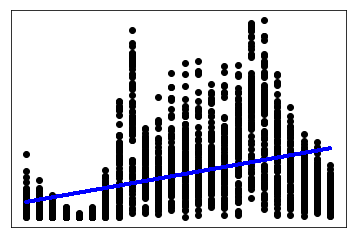

Mean squared error is 64197.8191001 !!


In [67]:
##### LINEAR REGRESSION MODEL #####

regr = linear_model.LinearRegression()
regr.fit(train_data_cols, train_labels)
print('Coefficients: \n', regr.coef_)



# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(dev_data_cols) - dev_labels) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(dev_data_cols, dev_labels))

# Plot outputs
plt.scatter(dev_data_cols, dev_labels,  color='black')
plt.plot(dev_data_cols, regr.predict(dev_data_cols), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

print 'Mean squared error is {} !!'.format(mean_squared_error(dev_labels, dev_data_cols))


In [72]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(train_data, train_labels)
model.score(train_data, train_labels)
#Predict Output
predicted= model.predict(dev_data)

TypeError: float() argument must be a string or a number

UNDERSTANDING RMSLE: 

https://www.slideshare.net/KhorSoonHin/rmsle-cost-function

http://technospeaknow.blogspot.in/2015/02/prediction-of-registered-bike-sharing.html

https://www.kaggle.com/c/bike-sharing-demand/discussion/9899#52134

https://gist.github.com/rowanv/70a109b9a5d3a4630f5d

In [ ]:
https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/

In [ ]:
http://www.techdreams.org/programming/solving-kaggles-bike-sharing-demand-machine-learning-problem/9343-20140821

In [ ]:
https://www.kaggle.com/tianji/bike-rental-predictions-using-lr-rf-gbr

What I used for rpart and party (R)
http://brandonharris.io/kaggle-bike-sharing/

Party provides an implementation of conditional inference trees. This is still recursive partitioning, similar to rpart, but there are a few important differences.

rpart() tends to choose variables that will provide many possible splits when building the tree. This initial selection bias can work well sometimes, but in other cases can cause a loss of accuracy in the model. A conditional inference tree avoids this initial selection bias by using a permutation test framework to calculate statistics on the covariates, and then determine which our of independent variables might be the most appropriate for building our decision / regression tree. Plainly put, conditional inference trees are a bit more methodical when it comes to deciding which covariates are most important to our outcome.